In [22]:
import numpy as np
import pandas as pd
import ta
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from ta import add_all_ta_features
from ta import momentum
from ta.utils import dropna

In [23]:
def get_data(company_symbol):
    return pd.read_csv("dataset/"+company_symbol+".csv")

In [24]:
data = get_data("GOOGL")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/19/2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4326,10/25/2021,2751.000000,2760.000000,2708.479980,2748.939941,2748.939941,1720600
4327,10/26/2021,2785.270020,2801.659912,2766.090088,2786.169922,2786.169922,2461800
4328,10/27/2021,2788.100098,2973.000000,2788.100098,2924.350098,2924.350098,4289100
4329,10/28/2021,2942.689941,2943.159912,2892.540039,2916.979980,2916.979980,1810300


In [25]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [26]:
data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [27]:
data[data.columns[data.isna().any()]]

""
0
1
2
3
4
...
4326
4327
4328
4329


In [28]:
cond1 = data.Date.isna() # aapl['Date'].isna()
cond2 = data.Date.str.contains(r'^\s*$', na=False)
cond3 = data.Date == ''

data_checked = data.assign(cond1= cond1, cond2= cond2, cond3= cond3)
print (data_checked)

            Date         Open         High          Low        Close  \
0      8/19/2004    50.050049    52.082081    48.028027    50.220219   
1      8/20/2004    50.555557    54.594597    50.300301    54.209209   
2      8/23/2004    55.430431    56.796799    54.579578    54.754753   
3      8/24/2004    55.675674    55.855858    51.836838    52.487488   
4      8/25/2004    52.532532    54.054054    51.991993    53.053055   
...          ...          ...          ...          ...          ...   
4326  10/25/2021  2751.000000  2760.000000  2708.479980  2748.939941   
4327  10/26/2021  2785.270020  2801.659912  2766.090088  2786.169922   
4328  10/27/2021  2788.100098  2973.000000  2788.100098  2924.350098   
4329  10/28/2021  2942.689941  2943.159912  2892.540039  2916.979980   
4330  10/29/2021  2901.560059  2964.840088  2892.989990  2960.919922   

        Adj Close    Volume  cond1  cond2  cond3  
0       50.220219  44659096  False  False  False  
1       54.209209  22834343  Fals

In [29]:
def change(close):
    return (close.shift(-1) - close)

In [30]:
def direction(change):
    return (np.where(change>0, 1, 0))

In [31]:
def compute_all_indicators(data):
    data['Change'] = change(data['Close'])
    data['Direction'] = direction(data['Change'])
    return data

In [32]:
complete_data = compute_all_indicators(data)
complete_data

,Date,Open,High,Low,Close,Adj Close,Volume,Change,Direction
0,8/19/2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,3.988990,1
1,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,0.545544,1
2,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,-2.267265,0
3,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,0.565567,1
4,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,0.955955,1
...,...,...,...,...,...,...,...,...,...
4326,10/25/2021,2751.000000,2760.000000,2708.479980,2748.939941,2748.939941,1720600,37.229981,1
4327,10/26/2021,2785.270020,2801.659912,2766.090088,2786.169922,2786.169922,2461800,138.180176,1
4328,10/27/2021,2788.100098,2973.000000,2788.100098,2924.350098,2924.350098,4289100,-7.370118,0
4329,10/28/2021,2942.689941,2943.159912,2892.540039,2916.979980,2916.979980,1810300,43.939942,1


In [33]:
data_change_up = complete_data[complete_data['Direction'] == 1]

In [34]:
data_change_up["Change"].mean()

7.750774479614202

In [35]:
data_change_up['Change'].sum()

17679.516588000002

In [36]:
data_change_up.count()

Date         2281
Open         2281
High         2281
Low          2281
Close        2281
Adj Close    2281
Volume       2281
Change       2281
Direction    2281
dtype: int64

In [37]:
data_change_down = complete_data[complete_data['Direction'] == 0]

In [38]:
data_change_down['Change'].mean()

-7.2078169277696436

In [39]:
data_change_down['Change'].sum()

-14768.816885

In [40]:
data_change_down.count()

Date         2050
Open         2050
High         2050
Low          2050
Close        2050
Adj Close    2050
Volume       2050
Change       2049
Direction    2050
dtype: int64

Text(0, 0.5, 'Price')

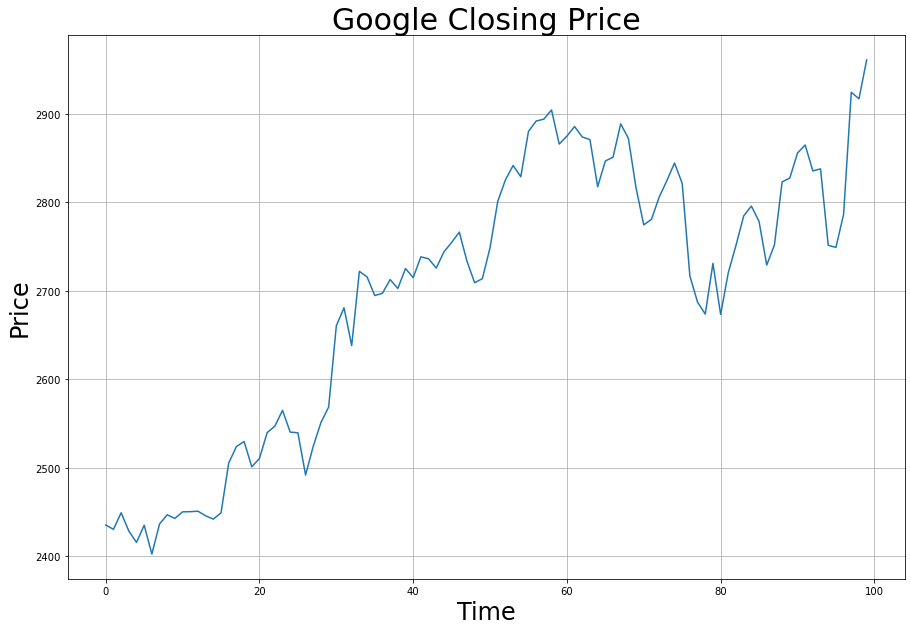

In [18]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(complete_data['Close'])
#plt.plot(dataMonthly['MA'],label='3-Month MA')
#plt.legend(loc=2, fontsize=18)
plt.title("Google Closing Price", fontsize=30)
plt.xlabel("Time", fontsize=24)
plt.ylabel("Price", fontsize=24)

In [19]:
data_5years = complete_data.iloc[4331-1250:4331, ]

In [150]:
buy_and_hold = (data_5years.iloc[1249,4] - data_5years.iloc[0,4]) / data_5years.iloc[0,4] * 100
buy_and_hold

283.6630932296728

In [151]:
data_up_5years = data_5years[data_5years['Direction'] == 1]
data_down_5years = data_5years[data_5years['Direction'] == 0]

In [152]:
max_up = data_up_5years['Change'].sum()
max_down = data_down_5years['Change'].sum()

In [153]:
avoid_tenth = (max_up+0.9*max_down)/data_5years.iloc[0,4]*100
avoid_tenth

398.4006241788145

In [154]:
theoretical_max = max_up / data_5years.iloc[0,4] * 100
theoretical_max

1431.038402721089

In [47]:
target = complete_data['Direction']
complete_data = complete_data.drop(['Date', 'Direction'], axis=1)
complete_data

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA10,StochasticK,StochasticD,...,WMA10,EMA12,EMA26,MACD,Momentum,RSI,CCI,DI,ADX,Aroon
14,1.104286,1.122143,1.080000,1.082857,1.082857,2567600,1.120857,1.125643,7.110768,9.805238,...,1.125195,1.130077,1.149996,-0.019919,90.507418,0.282646,-87.262252,-4.041967,6.531289,-12.0
15,1.082143,1.085714,0.980000,0.986429,0.986429,4783800,1.094429,1.116643,2.549744,7.386740,...,1.099883,1.107977,1.137880,-0.029902,81.523058,0.282646,-217.891706,-11.332225,9.143382,-56.0
16,1.013571,1.059286,0.917857,0.922143,0.922143,4855200,1.047571,1.096000,1.363726,3.674746,...,1.064520,1.079387,1.121899,-0.042512,79.691361,0.282646,-222.155602,-15.840926,19.140010,-60.0
17,0.938571,0.939286,0.842143,0.910714,0.910714,10808000,0.999000,1.075286,17.582308,7.165259,...,1.030831,1.053438,1.106256,-0.052818,82.524278,0.381194,-218.434212,-15.825737,27.026513,-64.0
18,0.911429,0.996429,0.892857,0.951429,0.951429,5482400,0.970714,1.055714,28.022051,15.656028,...,1.008312,1.037744,1.094787,-0.057043,88.800004,0.381194,-124.845930,-11.360356,33.442196,-64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,651.809998,665.460022,651.809998,664.780029,664.780029,6179700,644.009998,636.387994,98.839008,85.267842,...,641.291452,636.218990,619.660215,16.558775,110.181496,0.910010,289.554743,4.545124,30.296476,92.0
4890,663.739990,675.880005,657.070007,671.659973,671.659973,3833500,650.747998,640.849994,92.814518,96.740267,...,647.704539,641.671449,623.512049,18.159400,105.804883,0.675676,233.314986,5.191655,30.298693,96.0
4891,673.760010,676.489990,662.770020,668.520020,668.520020,2904800,656.652002,645.207996,86.568968,92.740831,...,652.735453,645.801998,626.845973,18.956025,104.603356,0.675676,164.113158,4.356440,30.769399,76.0
4892,669.000000,671.409973,661.849976,662.919983,662.919983,2276900,664.207996,648.523993,77.131758,85.505081,...,655.955814,648.435534,629.518122,18.917412,104.917308,0.675676,110.708606,3.125012,31.225713,76.0
